In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
plt.rcParams['figure.dpi'] = 300
plt.style.use('seaborn')
plt.rcParams.update({"text.usetex": True})
plt.style.use('seaborn-colorblind')

In [20]:
given_entropies = ['0.01','0.001','0.0001','1e-05']

In [28]:
def plot_rewards(file_path,window_size,label_name,plot_till=None,alpha_value=0.8):
    df = pd.DataFrame(np.loadtxt(file_path),columns=['reward'])
    rolling_average_reward = df['reward'].rolling(window=window_size).mean().dropna()
    if plot_till ==None:
        plt.plot(rolling_average_reward,label=label_name,alpha=alpha_value)
    else:
        plt.plot(rolling_average_reward[:plot_till],label=label_name,alpha=alpha_value)
    plt.ylabel(f'Rolling average of total rewards (window = {window_size})')
    plt.xlabel('Number of episodes')

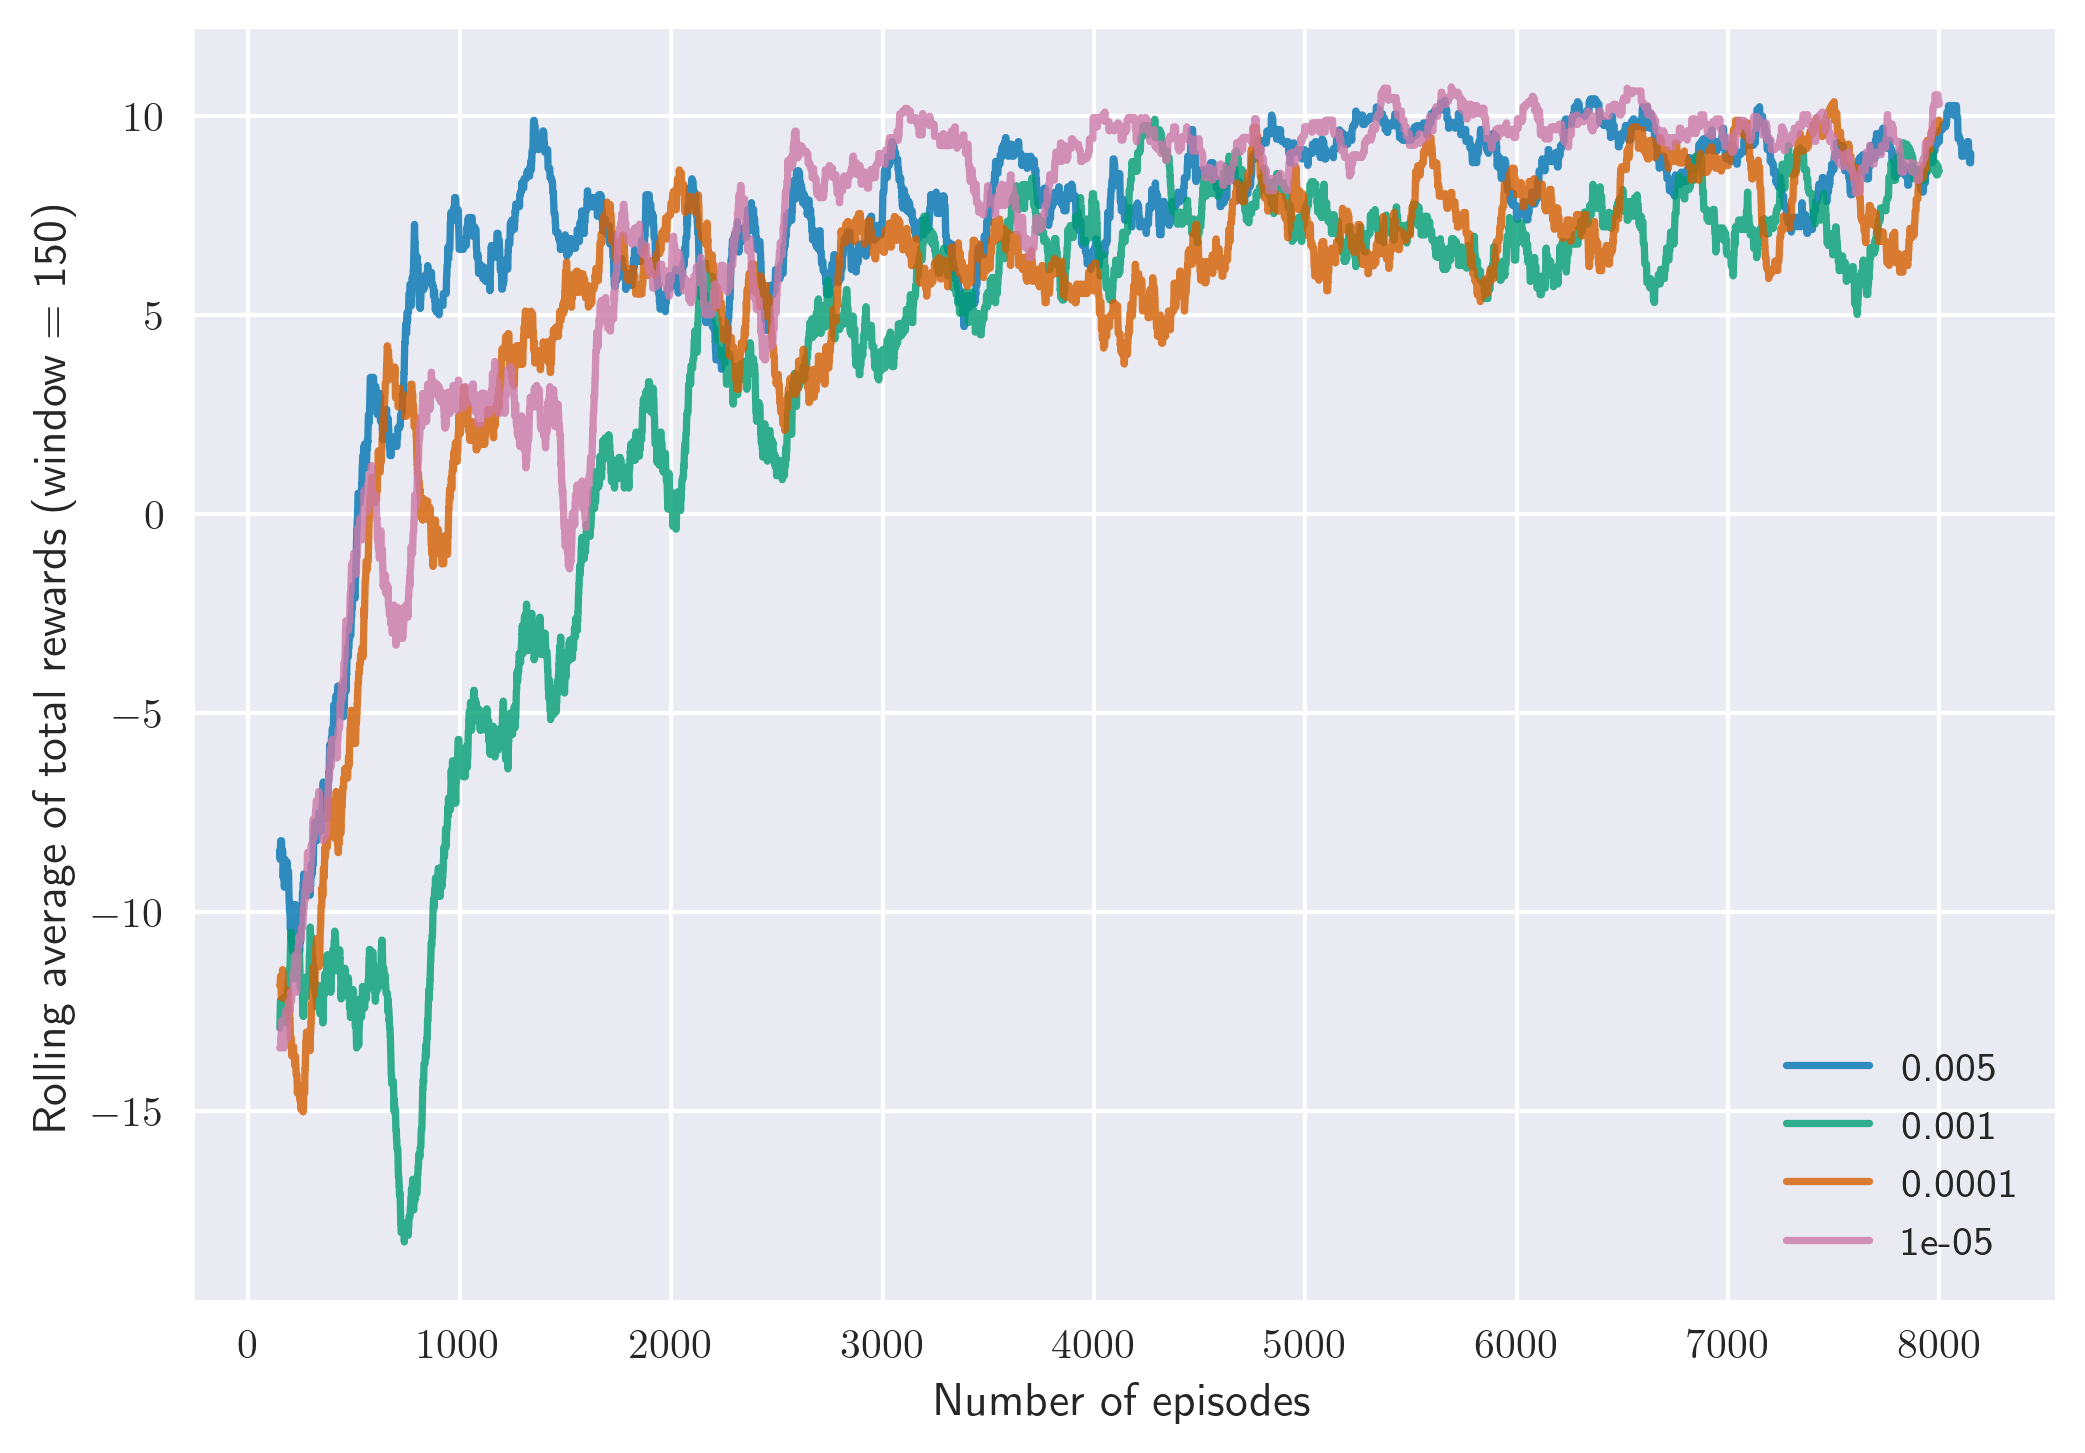

In [33]:
plot_rewards('saved_models/saved_rl_model_1_lr_0.0007_gamma_0.95_ep_16000_entropic_factor_0.005_co_30.0_trained_on_tp_30_training.txt',window_size=150,label_name='0.005',plot_till=8000)
# plot_rewards('saved_models/saved_rl_model_1_lr_0.0007_gamma_0.95_ep_8000_entropic_factor_0.01_co_30.0_trained_on_tp_30_training.txt',window_size=100,label_name='0.01')
plot_rewards('saved_models/saved_rl_model_1_lr_0.0007_gamma_0.95_ep_8000_entropic_factor_0.001_co_30.0_trained_on_tp_30_training.txt',window_size=150,label_name='0.001')
plot_rewards('saved_models/saved_rl_model_1_lr_0.0007_gamma_0.95_ep_8000_entropic_factor_0.0001_co_30.0_trained_on_tp_30_training.txt',window_size=150,label_name='0.0001')
plot_rewards('saved_models/saved_rl_model_1_lr_0.0007_gamma_0.95_ep_8000_entropic_factor_1e-05_co_30.0_trained_on_tp_30_training.txt',window_size=150,label_name='1e-05')
plt.legend()

In [3]:
with open('no_of_mutations_array_all_entropies.pkl','rb') as file:
    loaded_dict = pickle.load(file)

In [11]:
with open(f'validation_results/0.01.pkl','rb') as file:
    loaded_data = pickle.load(file)

In [34]:
def get_mutations_df(entropy_value):
    with open(f'validation_results/{entropy_value}.pkl','rb') as file:
        loaded_data = pickle.load(file)
    mutations_df = pd.concat([pd.DataFrame(loaded_data[i],columns=['position','amino_acid']) for i in loaded_data.keys()])
    return mutations_df

In [38]:
get_mutations_df('1e-05')['amino_acid'].value_counts()

P    2512
G     101
Y       5
C       3
K       2
M       1
I       1
R       1
H       1
Q       1
W       1
D       1
S       1
V       1
L       1
T       1
A       1
Name: amino_acid, dtype: int64

In [85]:
get_mutations_df('0.01').value_counts()

position  amino_acid
10        P             953
12        P             738
23        P             539
18        D             512
25        P             472
26        P              75
13        G              30
22        T              27
20        G               9
24        F               4
29        L               4
27        V               4
13        H               3
1         Y               3
11        Y               3
18        F               2
          P               2
0         N               2
22        K               2
11        G               2
5         P               2
4         Q               2
1         M               2
24        P               1
25        I               1
26        Q               1
          S               1
28        R               1
23        E               1
25        G               1
0         E               1
20        K               1
16        M               1
13        L               1
12        M               1

In [74]:
get_mutations_df('0.005').value_counts()

position  amino_acid
7         P             483
22        P             374
20        P             369
16        P             344
27        P             335
8         P             293
12        P             247
13        G              70
24        D              61
5         K               4
26        G               4
25        T               4
0         N               3
10        Y               3
2         M               3
18        D               2
12        A               2
7         W               2
16        F               2
25        W               1
28        P               1
26        N               1
          A               1
14        R               1
10        M               1
23        H               1
20        Q               1
14        D               1
1         R               1
29        M               1
dtype: int64

In [75]:
with open(f'validation_results/0.005.pkl','rb') as file:
    loaded_data = pickle.load(file)

In [82]:
for i in loaded_data.keys():
    if loaded_data[i][-1][1] !='P':
        print('i')
        print(loaded_data[i])

i
[[20, 'P'], [16, 'P'], [16, 'P'], [20, 'P'], [7, 'P'], [23, 'H']]
i
[[7, 'P'], [27, 'P'], [22, 'P'], [8, 'P'], [7, 'P'], [20, 'P'], [20, 'P'], [7, 'P'], [20, 'P'], [7, 'P'], [27, 'P'], [13, 'G']]
i
[[16, 'P'], [8, 'P'], [16, 'P'], [7, 'P'], [7, 'P'], [8, 'P'], [22, 'P'], [13, 'G']]
i
[[12, 'P'], [22, 'P'], [8, 'P'], [22, 'P'], [22, 'P'], [16, 'P'], [24, 'D']]
i
[[7, 'P'], [10, 'Y']]
i
[[12, 'P'], [8, 'P'], [7, 'P'], [16, 'P'], [22, 'P'], [12, 'P'], [16, 'P'], [8, 'P'], [26, 'G']]
i
[[20, 'P'], [7, 'P'], [7, 'P'], [8, 'P'], [13, 'G']]
i
[[7, 'P'], [22, 'P'], [27, 'P'], [7, 'P'], [27, 'P'], [13, 'G']]
i
[[12, 'P'], [22, 'P'], [22, 'P'], [24, 'D']]
i
[[16, 'P'], [8, 'P'], [12, 'P'], [16, 'P'], [27, 'P'], [7, 'P'], [16, 'P'], [12, 'P'], [24, 'D']]
i
[[16, 'P'], [8, 'P'], [8, 'P'], [16, 'P'], [12, 'P'], [12, 'P'], [7, 'P'], [24, 'D']]
i
[[7, 'P'], [7, 'P'], [7, 'P'], [27, 'P'], [13, 'G']]
i
[[22, 'P'], [7, 'P'], [7, 'P'], [7, 'P'], [12, 'P'], [22, 'P'], [22, 'P'], [24, 'D']]
i
[[12, 'P'],

In [56]:
(get_mutations_df('0.01')['amino_acid'].value_counts())

P    2782
D     512
G      43
T      27
F       7
Y       6
M       5
L       5
K       4
V       4
H       4
E       3
Q       3
S       2
N       2
W       1
A       1
R       1
I       1
Name: amino_acid, dtype: int64

In [42]:
pd.DataFrame(get_mutations_df('0.001').value_counts())

,,0
position,amino_acid,
7,P,735
21,P,626
15,P,526
11,D,514
12,G,336
20,P,286
13,R,51
17,Y,31
9,H,24


In [83]:
get_mutations_df('0.0001').value_counts()

position  amino_acid
24        P             878
11        P             758
18        P             446
9         P             374
8         T             113
20        P             107
21        G              98
12        G              37
7         D              15
13        D              11
17        T              10
23        N              10
19        G               8
8         S               7
          C               5
5         H               5
1         N               5
6         T               4
          H               4
16        Q               4
25        M               3
21        N               2
10        N               2
25        G               2
24        S               1
26        T               1
0         C               1
17        R               1
16        P               1
13        A               1
12        Q               1
0         G               1
8         N               1
          G               1
7         T               1

In [89]:
get_mutations_df('1e-05')['amino_acid'].value_counts()

P    2512
G     101
Y       5
C       3
K       2
M       1
I       1
R       1
H       1
Q       1
W       1
D       1
S       1
V       1
L       1
T       1
A       1
Name: amino_acid, dtype: int64

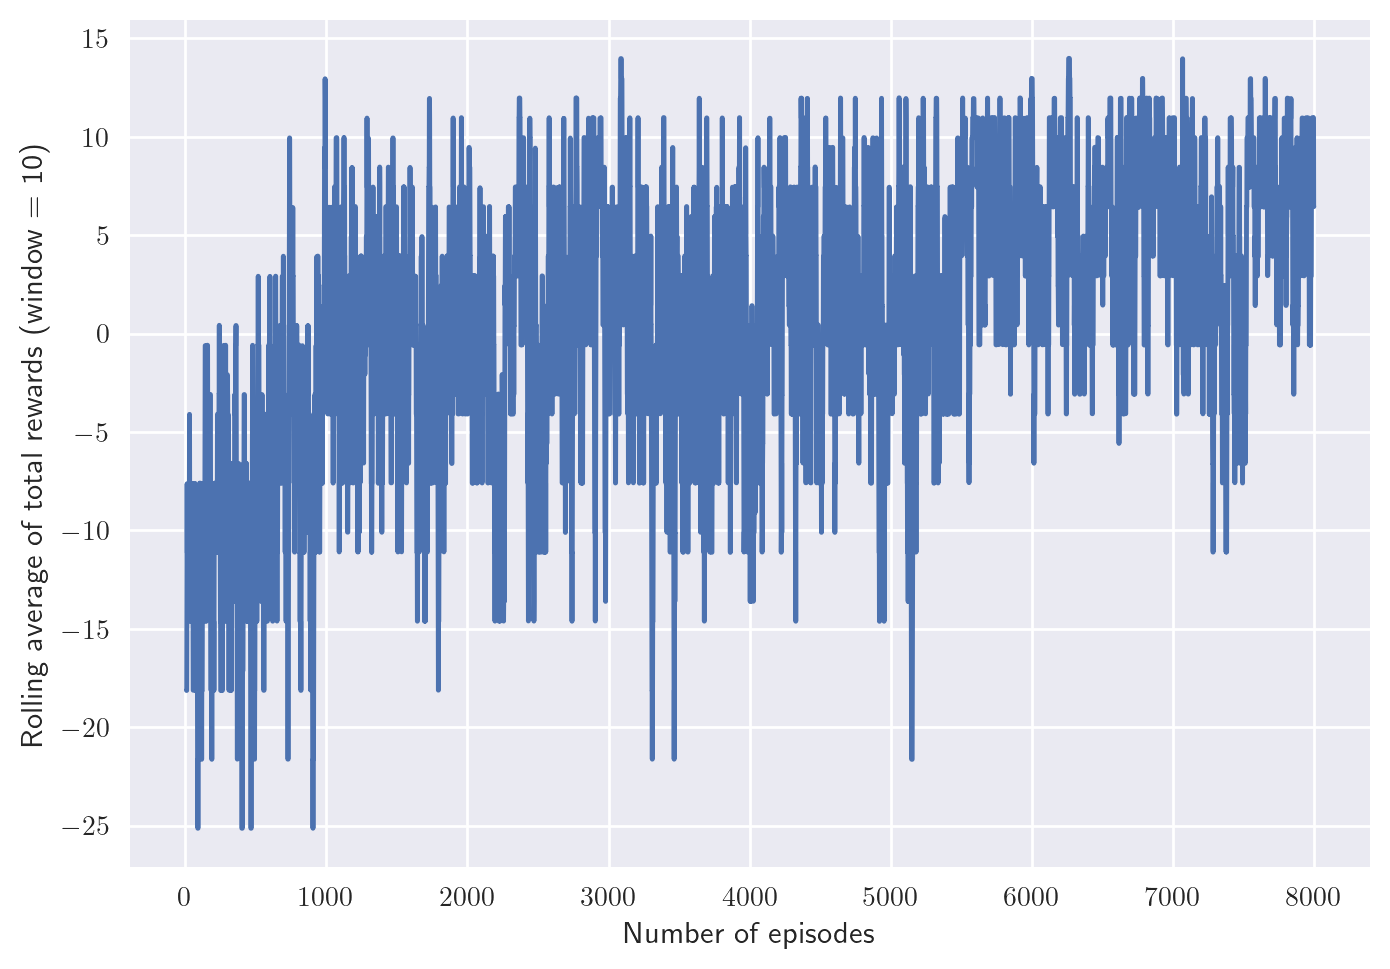

In [9]:
plot_rewards(file_path='saved_models/saved_rl_model_1_lr_0.0007_gamma_0.95_ep_8000_entropic_factor_0.01_co_30.0_trained_on_tp_30_training.txt',window_size=10)

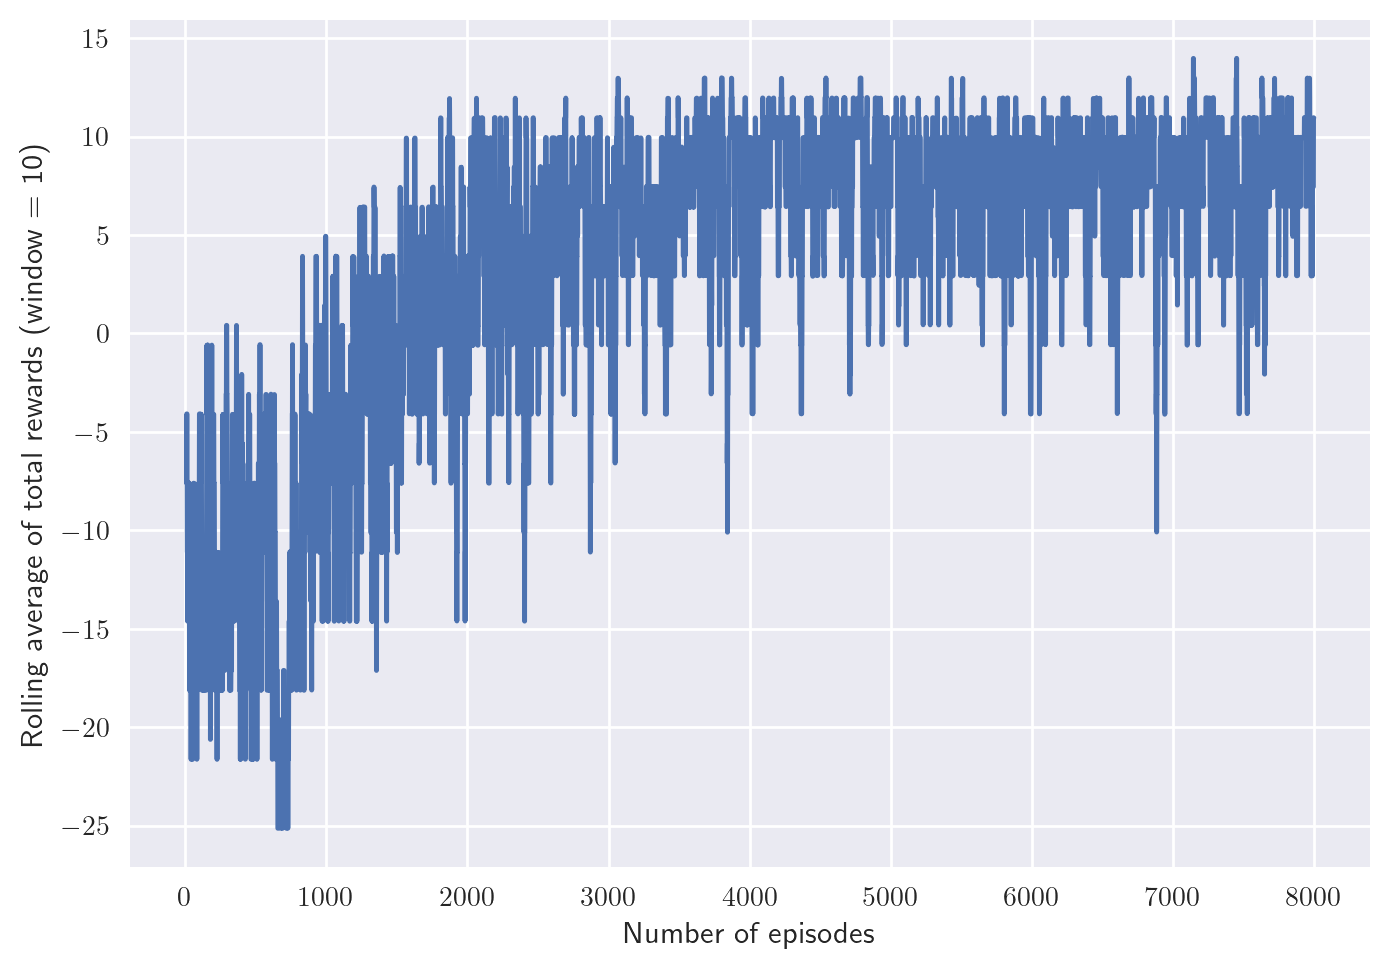

In [10]:
plot_rewards(file_path='saved_models/saved_rl_model_1_lr_0.0007_gamma_0.95_ep_8000_entropic_factor_0.001_co_30.0_trained_on_tp_30_training.txt',window_size=10)

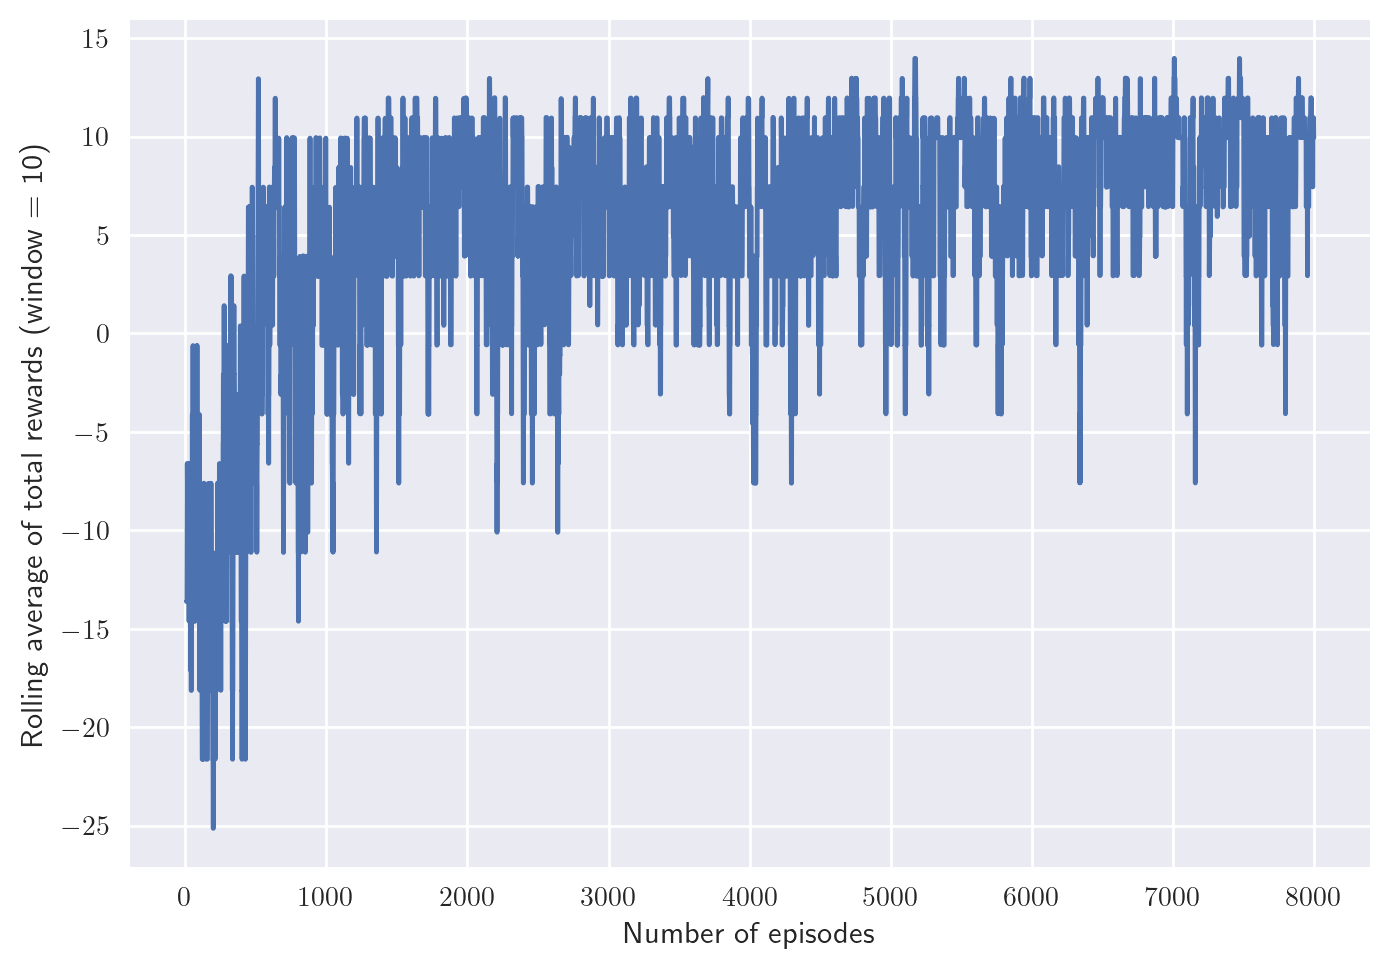

In [11]:
plot_rewards(file_path='saved_models/saved_rl_model_1_lr_0.0007_gamma_0.95_ep_8000_entropic_factor_0.0001_co_30.0_trained_on_tp_30_training.txt',window_size=10)

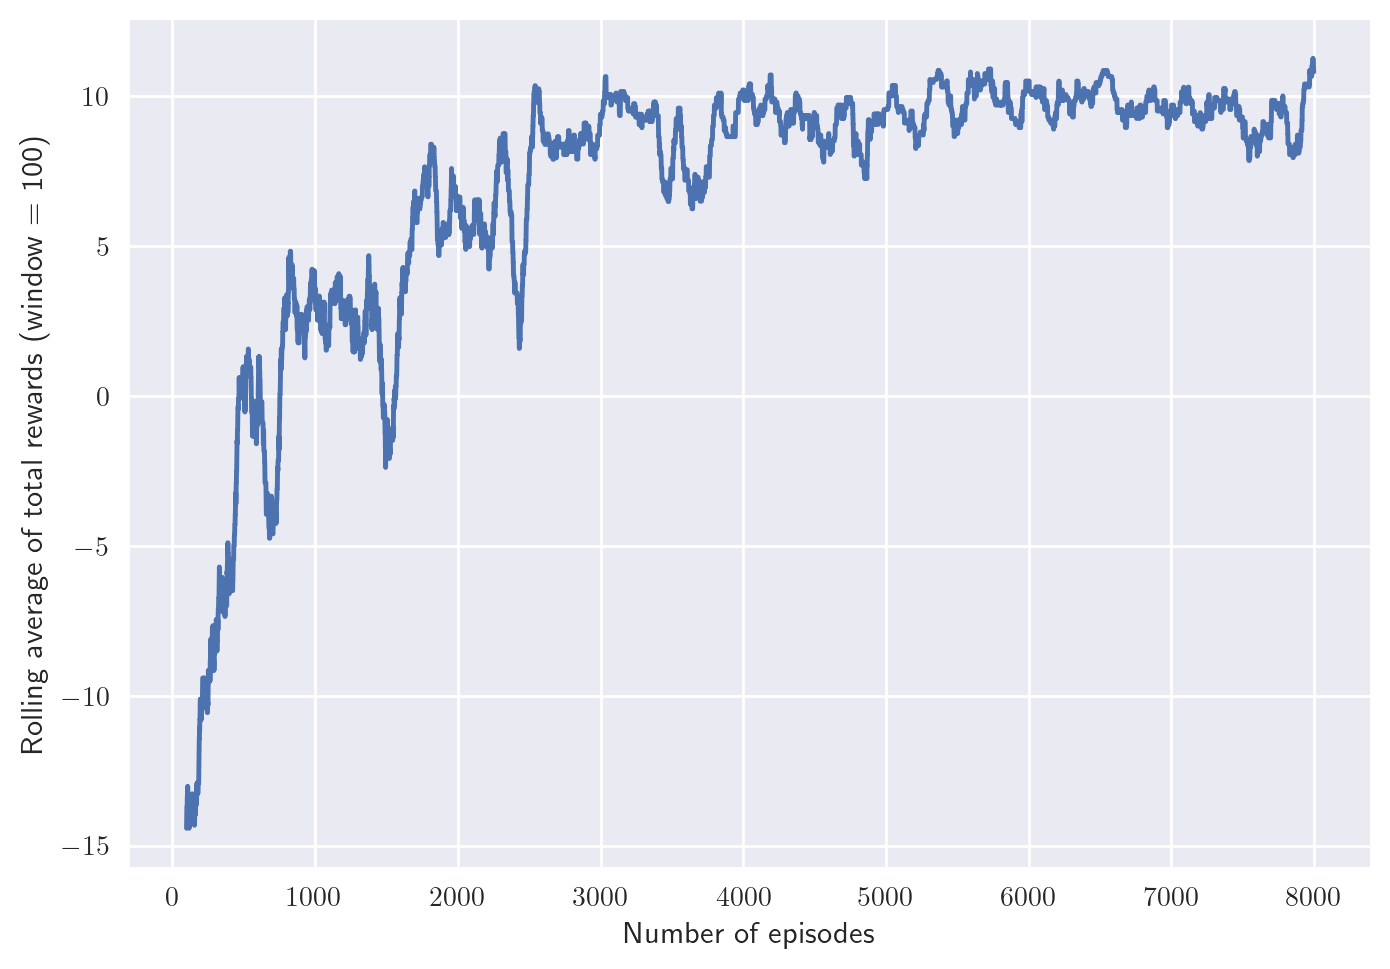

In [88]:
plot_rewards(file_path='saved_models/saved_rl_model_1_lr_0.0007_gamma_0.95_ep_8000_entropic_factor_1e-05_co_30.0_trained_on_tp_30_training.txt',window_size=100)